In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('exams.csv')

# Limpieza de datos

In [3]:
# Ver datos
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
# valores faltantes
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# tipos de datos
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
# Valores unicos
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [7]:
# Reemplazamos los valores de la columna 'gender'
df['gender'] = df['gender'].replace({'female': 1, 'male': 0})

In [8]:
# Reemplazamos los valores de la columna 'lunch'
df['lunch'] = df['lunch'].replace({'standard': 1, 'free/reduced': 0})

In [9]:
# Reemplazamos los valores de la columna 'test preparation course'
df['test preparation course'] = df['test preparation course'].replace({'completed': 1, 'none': 0})

In [10]:
# Valores unicos de la columna "parental level of education".
df['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [11]:
# Valores unicos de la columna "race/ethnicity".
df['race/ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [12]:
# Aplicar One-Hot Encoding a la columna "parental level of education" y "race/ethnicity" .
df_encoded = pd.get_dummies(df, columns=['parental level of education', 'race/ethnicity'], prefix=['Education', 'Race'], drop_first=True)

df_encoded

,gender,lunch,test preparation course,math score,reading score,writing score,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school,Race_group B,Race_group C,Race_group D,Race_group E
0,1,1,1,59,70,78,False,False,False,True,False,False,False,True,False
1,0,1,0,96,93,87,False,False,False,False,False,False,False,True,False
2,1,0,0,57,76,77,False,False,False,True,False,False,False,True,False
3,0,0,0,70,70,63,False,False,False,True,False,True,False,False,False
4,1,1,0,83,85,86,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,77,77,71,False,False,False,True,False,False,True,False,False
996,0,1,0,80,66,66,False,False,False,True,False,False,True,False,False
997,1,1,1,67,86,86,False,True,False,False,False,False,False,False,False
998,0,1,0,80,72,62,False,True,False,False,False,False,False,False,True


In [13]:
# Convertimos las columnas a tipo int64
df_encoded = df_encoded.astype({
    'gender': 'int64', 
    'lunch': 'int64', 
    'test preparation course': 'int64',
    'math score': 'int64',
    'reading score': 'int64',
    'writing score': 'int64',
    'Education_bachelor\'s degree': 'int64',
    'Education_high school': 'int64',
    'Education_master\'s degree': 'int64',
    'Education_some college': 'int64',
    'Education_some high school': 'int64',
    'Race_group B': 'int64',
    'Race_group C': 'int64',
    'Race_group D': 'int64',
    'Race_group E': 'int64'
})

In [14]:
df_encoded

,gender,lunch,test preparation course,math score,reading score,writing score,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school,Race_group B,Race_group C,Race_group D,Race_group E
0,1,1,1,59,70,78,0,0,0,1,0,0,0,1,0
1,0,1,0,96,93,87,0,0,0,0,0,0,0,1,0
2,1,0,0,57,76,77,0,0,0,1,0,0,0,1,0
3,0,0,0,70,70,63,0,0,0,1,0,1,0,0,0
4,1,1,0,83,85,86,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,77,77,71,0,0,0,1,0,0,1,0,0
996,0,1,0,80,66,66,0,0,0,1,0,0,1,0,0
997,1,1,1,67,86,86,0,1,0,0,0,0,0,0,0
998,0,1,0,80,72,62,0,1,0,0,0,0,0,0,1


In [15]:
df_encoded.dtypes

gender                         int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
Education_bachelor's degree    int64
Education_high school          int64
Education_master's degree      int64
Education_some college         int64
Education_some high school     int64
Race_group B                   int64
Race_group C                   int64
Race_group D                   int64
Race_group E                   int64
dtype: object

In [16]:
# Calcula la matriz de correlación
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                               gender     lunch  test preparation course  \
gender                       1.000000 -0.015708                 0.032641   
lunch                       -0.015708  1.000000                -0.093498   
test preparation course      0.032641 -0.093498                 1.000000   
math score                  -0.195992  0.372465                 0.119925   
reading score                0.215775  0.241319                 0.223132   
writing score                0.281707  0.234400                 0.321520   
Education_bachelor's degree  0.002218 -0.008952                 0.026644   
Education_high school        0.049760 -0.030317                -0.010043   
Education_master's degree   -0.029618  0.004007                -0.038363   
Education_some college      -0.020189  0.010937                 0.004766   
Education_some high school  -0.016163  0.039712                 0.000618   
Race_group B                 0.073205 -0.040685                -0.011157   
Race_group C

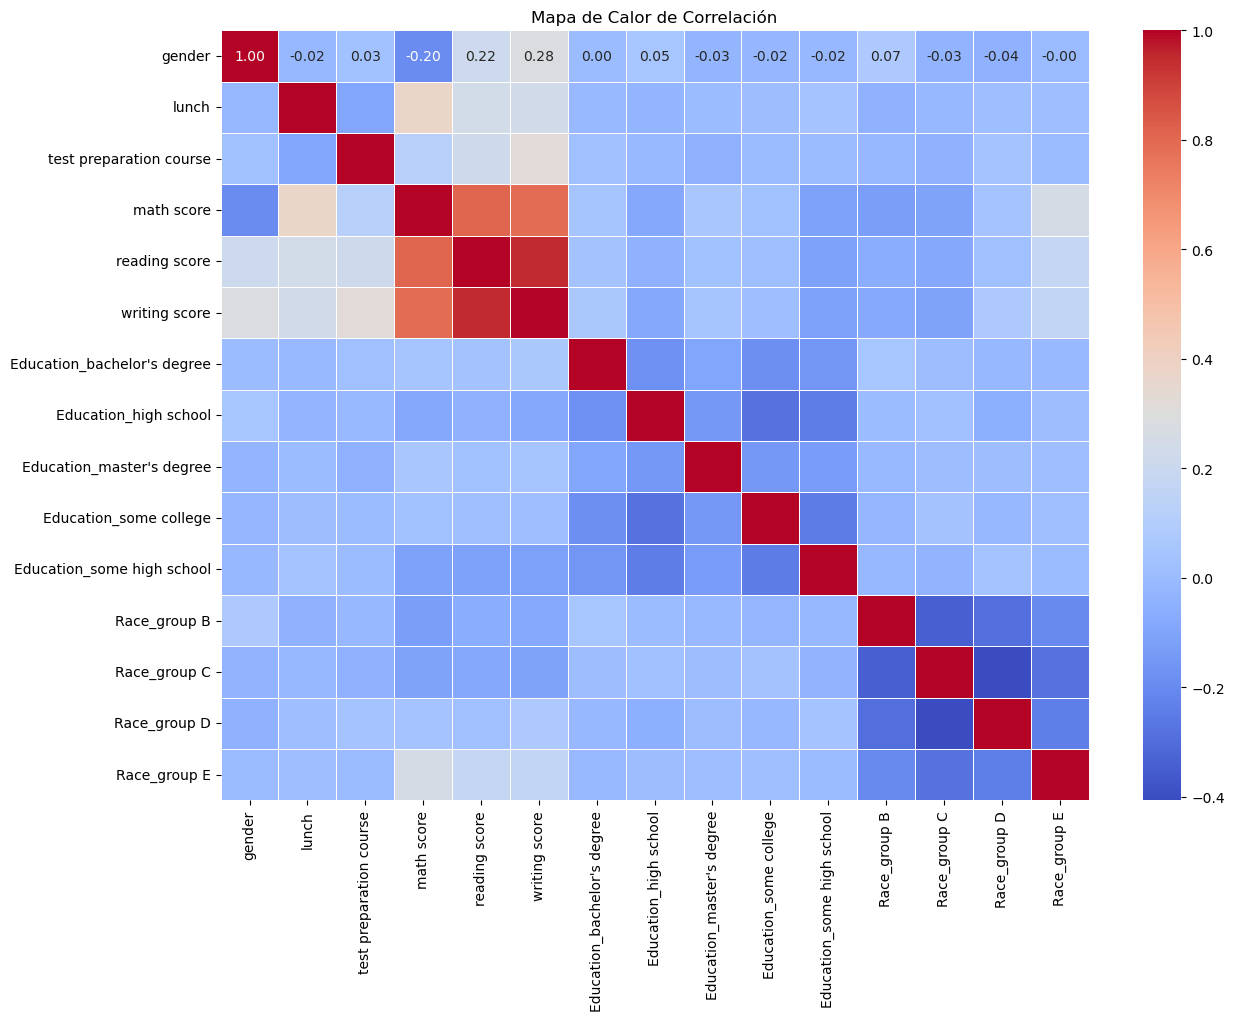

In [17]:
plt.figure(figsize=(14, 10))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [18]:
# Preparar los datos
X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standarizar
# Inicializar el escalador
scaler = StandardScaler()

# Estandarizar las características en X_train y X_test
X_train[['reading score', 'writing score']] = scaler.fit_transform(X_train[['reading score', 'writing score']])
X_test[['reading score', 'writing score']] = scaler.transform(X_test[['reading score', 'writing score']])

# Estandarizar la variable objetivo en y_train y y_test
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Usamos flatten() para que sea un vector
y_test = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Mostramos los resultados
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train[:5])

print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test[:5])

X_train:
     gender  lunch  test preparation course  reading score  writing score  \
29        0      1                        0       1.175894       1.121346   
535       0      0                        1      -0.984907      -1.036346   
695       1      1                        1       1.106190       1.186731   
557       1      0                        0       0.269752      -0.055577   
836       1      1                        1       0.409158       0.467500   

     Education_bachelor's degree  Education_high school  \
29                             0                      0   
535                            0                      0   
695                            0                      0   
557                            0                      0   
836                            0                      0   

     Education_master's degree  Education_some college  \
29                           0                       0   
535                          0                       0   

## Histograma Standarizado

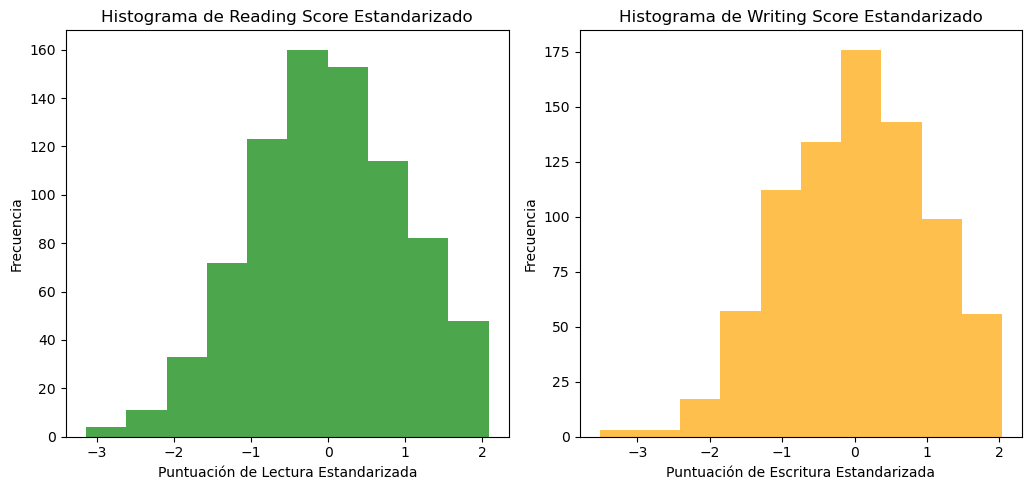

In [20]:
# Crear un histograma para cada una de las columnas de puntaje estandarizadas
plt.figure(figsize=(15, 5))

# Histograma de reading score
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(X_train['reading score'], bins=10, color='green', alpha=0.7)
plt.title('Histograma de Reading Score Estandarizado')
plt.xlabel('Puntuación de Lectura Estandarizada')
plt.ylabel('Frecuencia')

# Histograma de writing score
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(X_train['writing score'], bins=10, color='orange', alpha=0.7)
plt.title('Histograma de Writing Score Estandarizado')
plt.xlabel('Puntuación de Escritura Estandarizada')
plt.ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [21]:
# Normalización
# Inicializar el normalizador
scaler = MinMaxScaler()

# Normalizar las características en X_train y X_test
X_train[['reading score', 'writing score']] = scaler.fit_transform(X_train[['reading score', 'writing score']])
X_test[['reading score', 'writing score']] = scaler.transform(X_test[['reading score', 'writing score']])

# Normalizar la variable objetivo en y_train y y_test
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()  # Usamos flatten() para que sea un vector
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Mostramos los resultados
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train[:5])

print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test[:5])

X_train:
     gender  lunch  test preparation course  reading score  writing score  \
29        0      1                        0       0.826667       0.835294   
535       0      0                        1       0.413333       0.447059   
695       1      1                        1       0.813333       0.847059   
557       1      0                        0       0.653333       0.623529   
836       1      1                        1       0.680000       0.717647   

     Education_bachelor's degree  Education_high school  \
29                             0                      0   
535                            0                      0   
695                            0                      0   
557                            0                      0   
836                            0                      0   

     Education_master's degree  Education_some college  \
29                           0                       0   
535                          0                       0   

## Histograma Normalizado

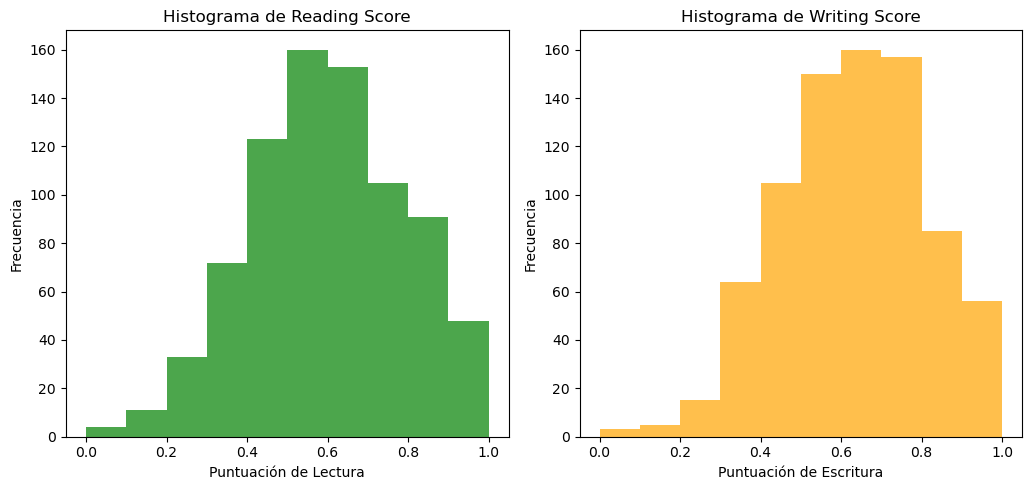

In [22]:
# Crear un histograma para cada una de las columnas de puntaje
plt.figure(figsize=(15, 5))

# Histograma de reading score
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(X_train['reading score'], bins=10, color='green', alpha=0.7)
plt.title('Histograma de Reading Score')
plt.xlabel('Puntuación de Lectura')
plt.ylabel('Frecuencia')

# Histograma de writing score
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(X_train['writing score'], bins=10, color='orange', alpha=0.7)
plt.title('Histograma de Writing Score')
plt.xlabel('Puntuación de Escritura')
plt.ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

## Linear Regression

Error Absoluto Medio (MAE): 0.05
Raíz del Error Cuadrático Medio (RMSE): 0.06
R^2 Score: 0.89


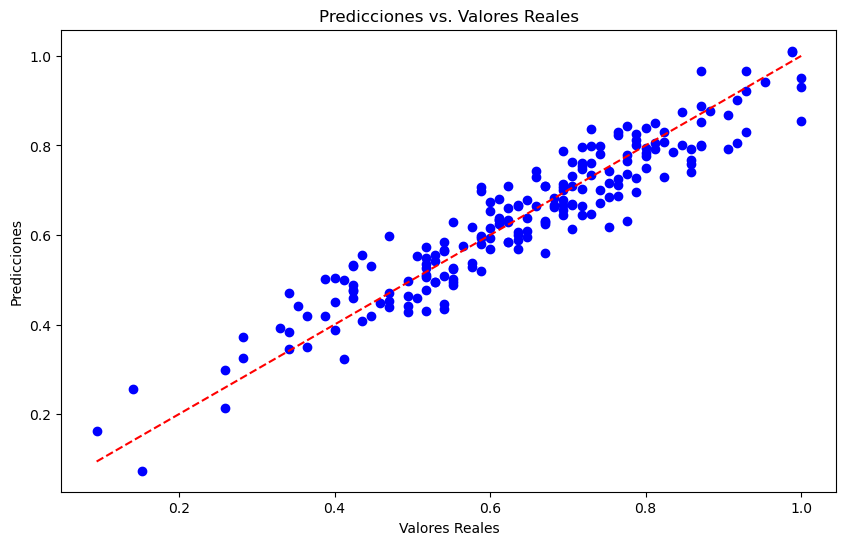

In [23]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el RMSE manualmente
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Comparar valores reales y predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Línea de identidad
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

## Random Forest

Error Absoluto Medio (MAE): 0.05
Raíz del Error Cuadrático Medio (RMSE): 0.07
R^2 Score: 0.85


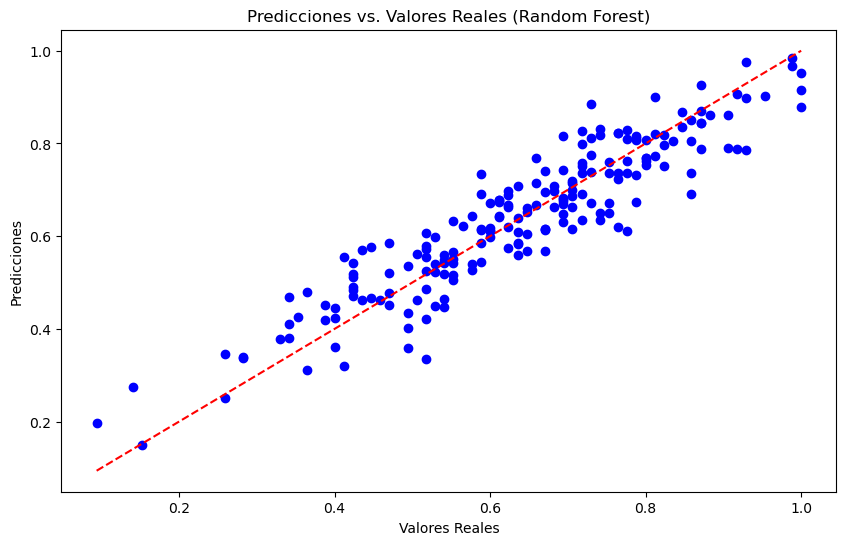

In [24]:
# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el RMSE manualmente
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Comparar valores reales y predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Línea de identidad
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Random Forest)')
plt.show()


## Comparativa modelos


In [25]:
# División de los datos
X = df[['math score', 'reading score']]  # Variables predictoras (ejemplo)
y = df['writing score']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Modelo Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar ambos modelos
print("Regresión Lineal:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Regresión Lineal:
MAE: 3.5981226315793493
R2 Score: 0.8998200410909988

Random Forest:
MAE: 4.2542189802789805
R2 Score: 0.8618670467510445


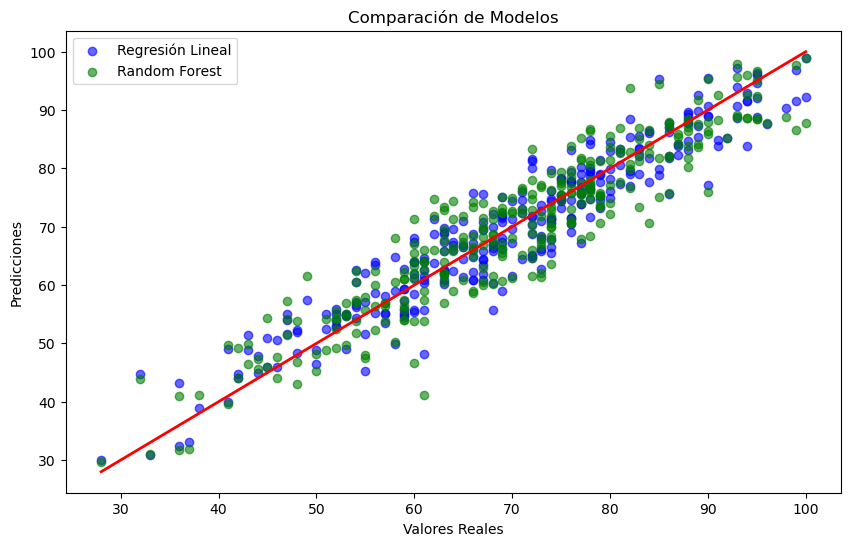

In [26]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Regresión Lineal', alpha=0.6)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Modelos')
plt.legend()
plt.show()


### Aplicacion modelo 

In [28]:
# Redondear las predicciones de Regresión Lineal a 2 decimales
df['prediccion_regresion_lineal'] = linear_model.predict(df[['math score', 'reading score']])
df['prediccion_regresion_lineal'] = df['prediccion_regresion_lineal'].round(2)

# Redondear las predicciones de Random Forest a 2 decimales (si también lo estás usando)
df['prediccion_random_forest'] = rf_model.predict(df[['math score', 'reading score']])
df['prediccion_random_forest'] = df['prediccion_random_forest'].round(2)

# Crear el DataFrame con los resultados redondeados
resultados = df[['math score', 'reading score', 'writing score', 'prediccion_regresion_lineal', 'prediccion_random_forest']]
resultados.head()  # Mostrar las primeras filas del DataFrame con los resultados


,math score,reading score,writing score,prediccion_regresion_lineal,prediccion_random_forest
0,59,70,78,68.28,75.30
1,96,93,87,92.30,87.74
2,57,76,77,73.98,75.69
3,70,70,63,68.82,73.42
4,83,85,86,83.94,89.17


#### ### Conclusiones Finales

Después de probar diferentes modelos, se ha determinado que la **Regresión Lineal** es el modelo más adecuado para predecir la puntuación de escritura en función de las puntuaciones de matemáticas y lectura. Esto se debe a los siguientes factores:

- **Menor MAE**: La Regresión Lineal tiene un error absoluto promedio más bajo (MAE = 3.60), lo que indica predicciones más precisas en comparación con Random Forest.
- **Mejor R²**: La Regresión Lineal tiene un mejor coeficiente de determinación (R² = 0.90), lo que sugiere que este modelo captura mejor las relaciones entre las variables en comparación con Random Forest.
- **Simplicidad**: Dado que las relaciones entre las variables parecen ser principalmente lineales, un modelo simple como la Regresión Lineal es suficiente para obtener buenos resultados, evitando la complejidad adicional de modelos no lineales como Random Forest.

Por lo tanto, el modelo final elegido para este proyecto es la **Regresión Lineal**.
